In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_excel(r'C:\Users\alira\Downloads\projects\houses_prices\Zillow.com House Price Prediction Data.xlsx')
df.head(5)

,contact_recipients,longitude,countyFIPS,imgSrc,livingAreaValue,streetAddress,county,monthlyHoaFee,timeZone,taxHistory,...,mlsid,listingSubType,pageViewCount,buildingId,country,homeType,solarPotential,contingentListingType,message,resoFacts.daysOnZillow
0,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90807,2020.0,https://photos.zillowstatic.com/fp/ce047439c86...,2668.0,500 North St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1691996796990, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",12925.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
1,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90822,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3179.0,520 N St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1692004111174, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
2,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90833,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3059.0,522 N St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1691999146138, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",21.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
3,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN
4,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90834,2020.0,https://photos.zillowstatic.com/fp/10602cde74a...,1642.0,530 North St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1692004364225, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['contact_recipients', 'longitude', 'countyFIPS', 'imgSrc',
       'livingAreaValue', 'streetAddress', 'county', 'monthlyHoaFee',
       'timeZone', 'taxHistory', 'dateSold', 'annualHomeownersInsurance',
       'state', 'listed_by', 'yearBuilt', 'brokerageName', 'description',
       'latitude', 'nearbyHomes', 'priceHistory', 'schools', 'rentZestimate',
       'city', 'providerListingID', 'currency', 'listingProvider',
       'zestimateLowPercent', 'openHouseSchedule', 'mortgageRates', 'address',
       'cityId', 'timeOnZillow', 'url', 'zestimate', 'zpid', 'countyId',
       'brokerId', 'livingAreaUnits', 'comingSoonOnMarketDate', 'livingArea',
       'building', 'stateId', 'zipcode', 'propertyTaxRate', 'attributionInfo',
       'bathrooms', 'homeStatus', 'homeFacts', 'resoFacts', 'datePosted',
       'bedrooms', 'propertyTypeDimension', 'mortgageZHLRates', 'price',
       'favoriteCount', 'isListedByOwner', 'zestimateHighPercent', 'mlsid',
       'listingSubType', 'pageViewCount

In [4]:
df = pd.DataFrame(df[['price', 'livingArea', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'zipcode', 
                      'yearBuilt', 'monthlyHoaFee', 'propertyTaxRate', 'annualHomeownersInsurance',
                      'zestimate', 'zestimateLowPercent', 'zestimateHighPercent', 'timeOnZillow', 
                      'priceHistory', 'homeType', 'homeStatus']])


In [5]:
df.head(3)

,price,livingArea,bedrooms,bathrooms,latitude,longitude,zipcode,yearBuilt,monthlyHoaFee,propertyTaxRate,annualHomeownersInsurance,zestimate,zestimateLowPercent,zestimateHighPercent,timeOnZillow,priceHistory,homeType,homeStatus
0,676100,2668.0,3.0,2.0,61.217308,-149.90807,99501,1959.0,NaN,1.31,2840,676100.0,12.0,13.0,3609 days,"[{'priceChangeRate': 0, 'date': '2014-09-26', ...",SINGLE_FAMILY,OTHER
1,698600,3179.0,3.0,2.0,61.217136,-149.90822,99501,1961.0,NaN,1.31,2934,698600.0,12.0,13.0,NaN,{},SINGLE_FAMILY,OTHER
2,996800,3059.0,4.0,3.0,61.217000,-149.90833,99501,1983.0,NaN,1.31,4187,996800.0,12.0,14.0,3758 days,"[{'priceChangeRate': 0, 'date': '2014-04-30', ...",SINGLE_FAMILY,OTHER


In [6]:
df.shape

(7160, 18)

In [7]:
df.drop(['monthlyHoaFee','priceHistory','zipcode','zestimate','zestimateLowPercent','zestimateHighPercent','timeOnZillow','homeStatus'],inplace=True , axis=1)

In [8]:
df.head(3)

,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance,homeType
0,676100,2668.0,3.0,2.0,61.217308,-149.90807,1959.0,1.31,2840,SINGLE_FAMILY
1,698600,3179.0,3.0,2.0,61.217136,-149.90822,1961.0,1.31,2934,SINGLE_FAMILY
2,996800,3059.0,4.0,3.0,61.217000,-149.90833,1983.0,1.31,4187,SINGLE_FAMILY


In [9]:
df.isnull().sum()

price                           0
livingArea                   1291
bedrooms                     1328
bathrooms                    1243
latitude                     1118
longitude                    1118
yearBuilt                    1470
propertyTaxRate              1125
annualHomeownersInsurance       0
homeType                      891
dtype: int64

<Axes: >

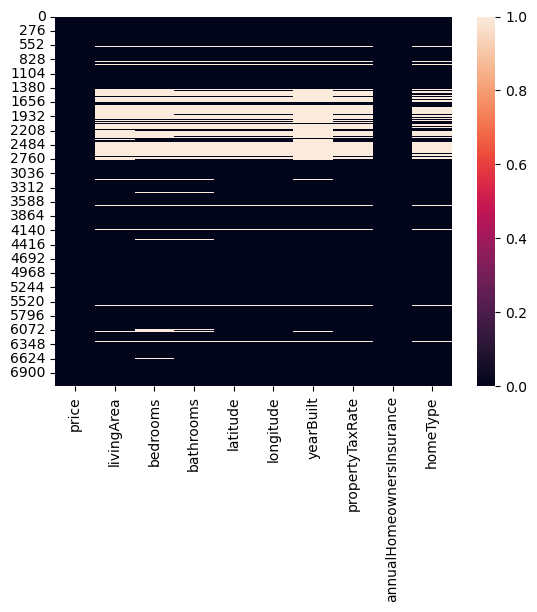

In [10]:
sns.heatmap(df.isnull())

In [11]:
df['homeType'].value_counts()

homeType
SINGLE_FAMILY        4074
CONDO                 901
MULTI_FAMILY          511
APARTMENT             253
HOME_TYPE_UNKNOWN     236
TOWNHOUSE             185
LOT                    93
MANUFACTURED           16
Name: count, dtype: int64

In [12]:
df.dropna(subset='livingArea',inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 0 to 7159
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      5869 non-null   int64  
 1   livingArea                 5869 non-null   float64
 2   bedrooms                   5770 non-null   float64
 3   bathrooms                  5802 non-null   float64
 4   latitude                   5868 non-null   float64
 5   longitude                  5868 non-null   float64
 6   yearBuilt                  5681 non-null   float64
 7   propertyTaxRate            5868 non-null   float64
 8   annualHomeownersInsurance  5869 non-null   int64  
 9   homeType                   5869 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 504.4+ KB


In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

price                        0
livingArea                   0
bedrooms                     0
bathrooms                    0
latitude                     0
longitude                    0
yearBuilt                    0
propertyTaxRate              0
annualHomeownersInsurance    0
homeType                     0
dtype: int64

In [16]:
df.head(3)

,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance,homeType
0,676100,2668.0,3.0,2.0,61.217308,-149.90807,1959.0,1.31,2840,SINGLE_FAMILY
1,698600,3179.0,3.0,2.0,61.217136,-149.90822,1961.0,1.31,2934,SINGLE_FAMILY
2,996800,3059.0,4.0,3.0,61.217000,-149.90833,1983.0,1.31,4187,SINGLE_FAMILY


In [17]:
df[['bedrooms','bathrooms','yearBuilt']]=df[['bedrooms','bathrooms','yearBuilt']].astype('int')
df['price']=df['price'].astype('float')

In [18]:
df['homeType']=df['homeType'].str.title()

C:\Users\alira\AppData\Local\Temp\ipykernel_19964\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

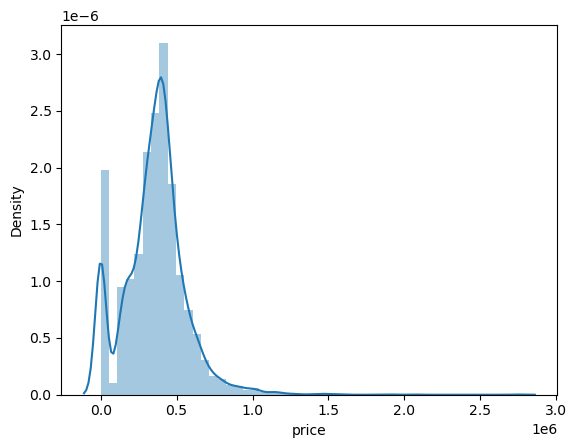

In [19]:
sns.distplot(df['price'])

In [20]:
len(df.query('price == 0'))


606

In [21]:
df.drop(df[df['price'] == 0].index, axis=0, inplace=True)

In [22]:
len(df.query('price == 0'))


0

C:\Users\alira\AppData\Local\Temp\ipykernel_19964\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

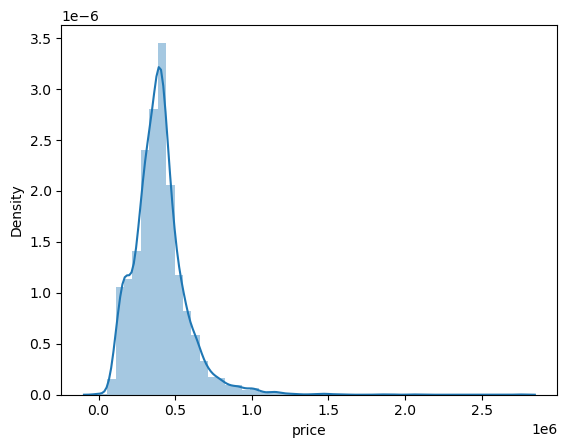

In [23]:
sns.distplot(df['price'])

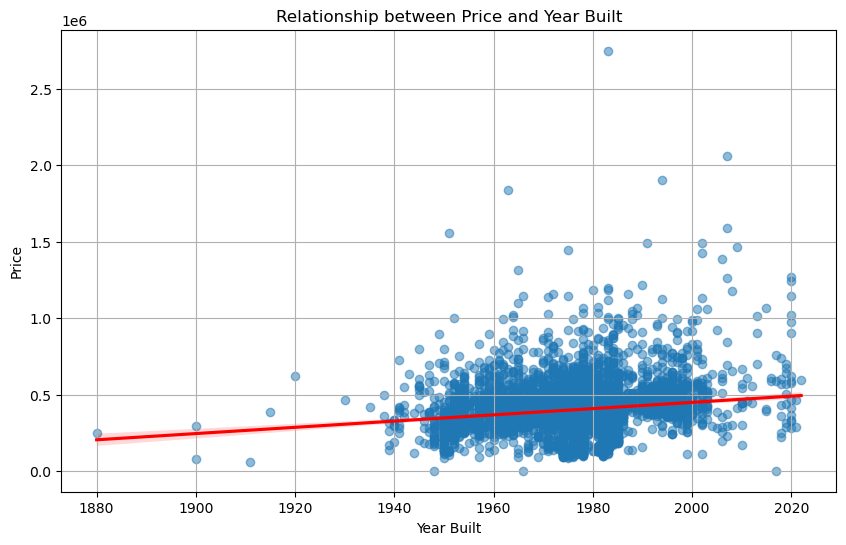

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='yearBuilt', y='price', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Relationship between Price and Year Built')
plt.grid(True)  
plt.show()

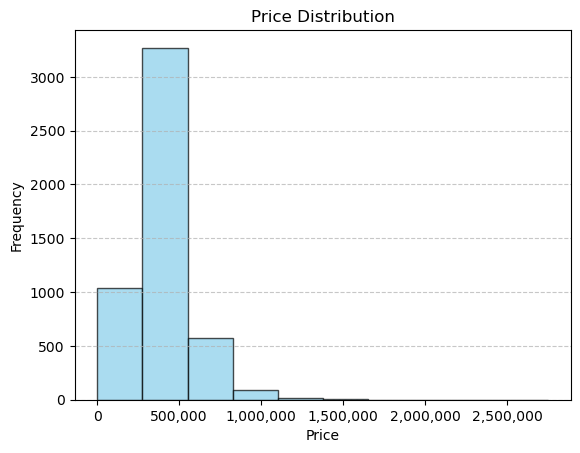

In [25]:

plt.hist(df['price'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


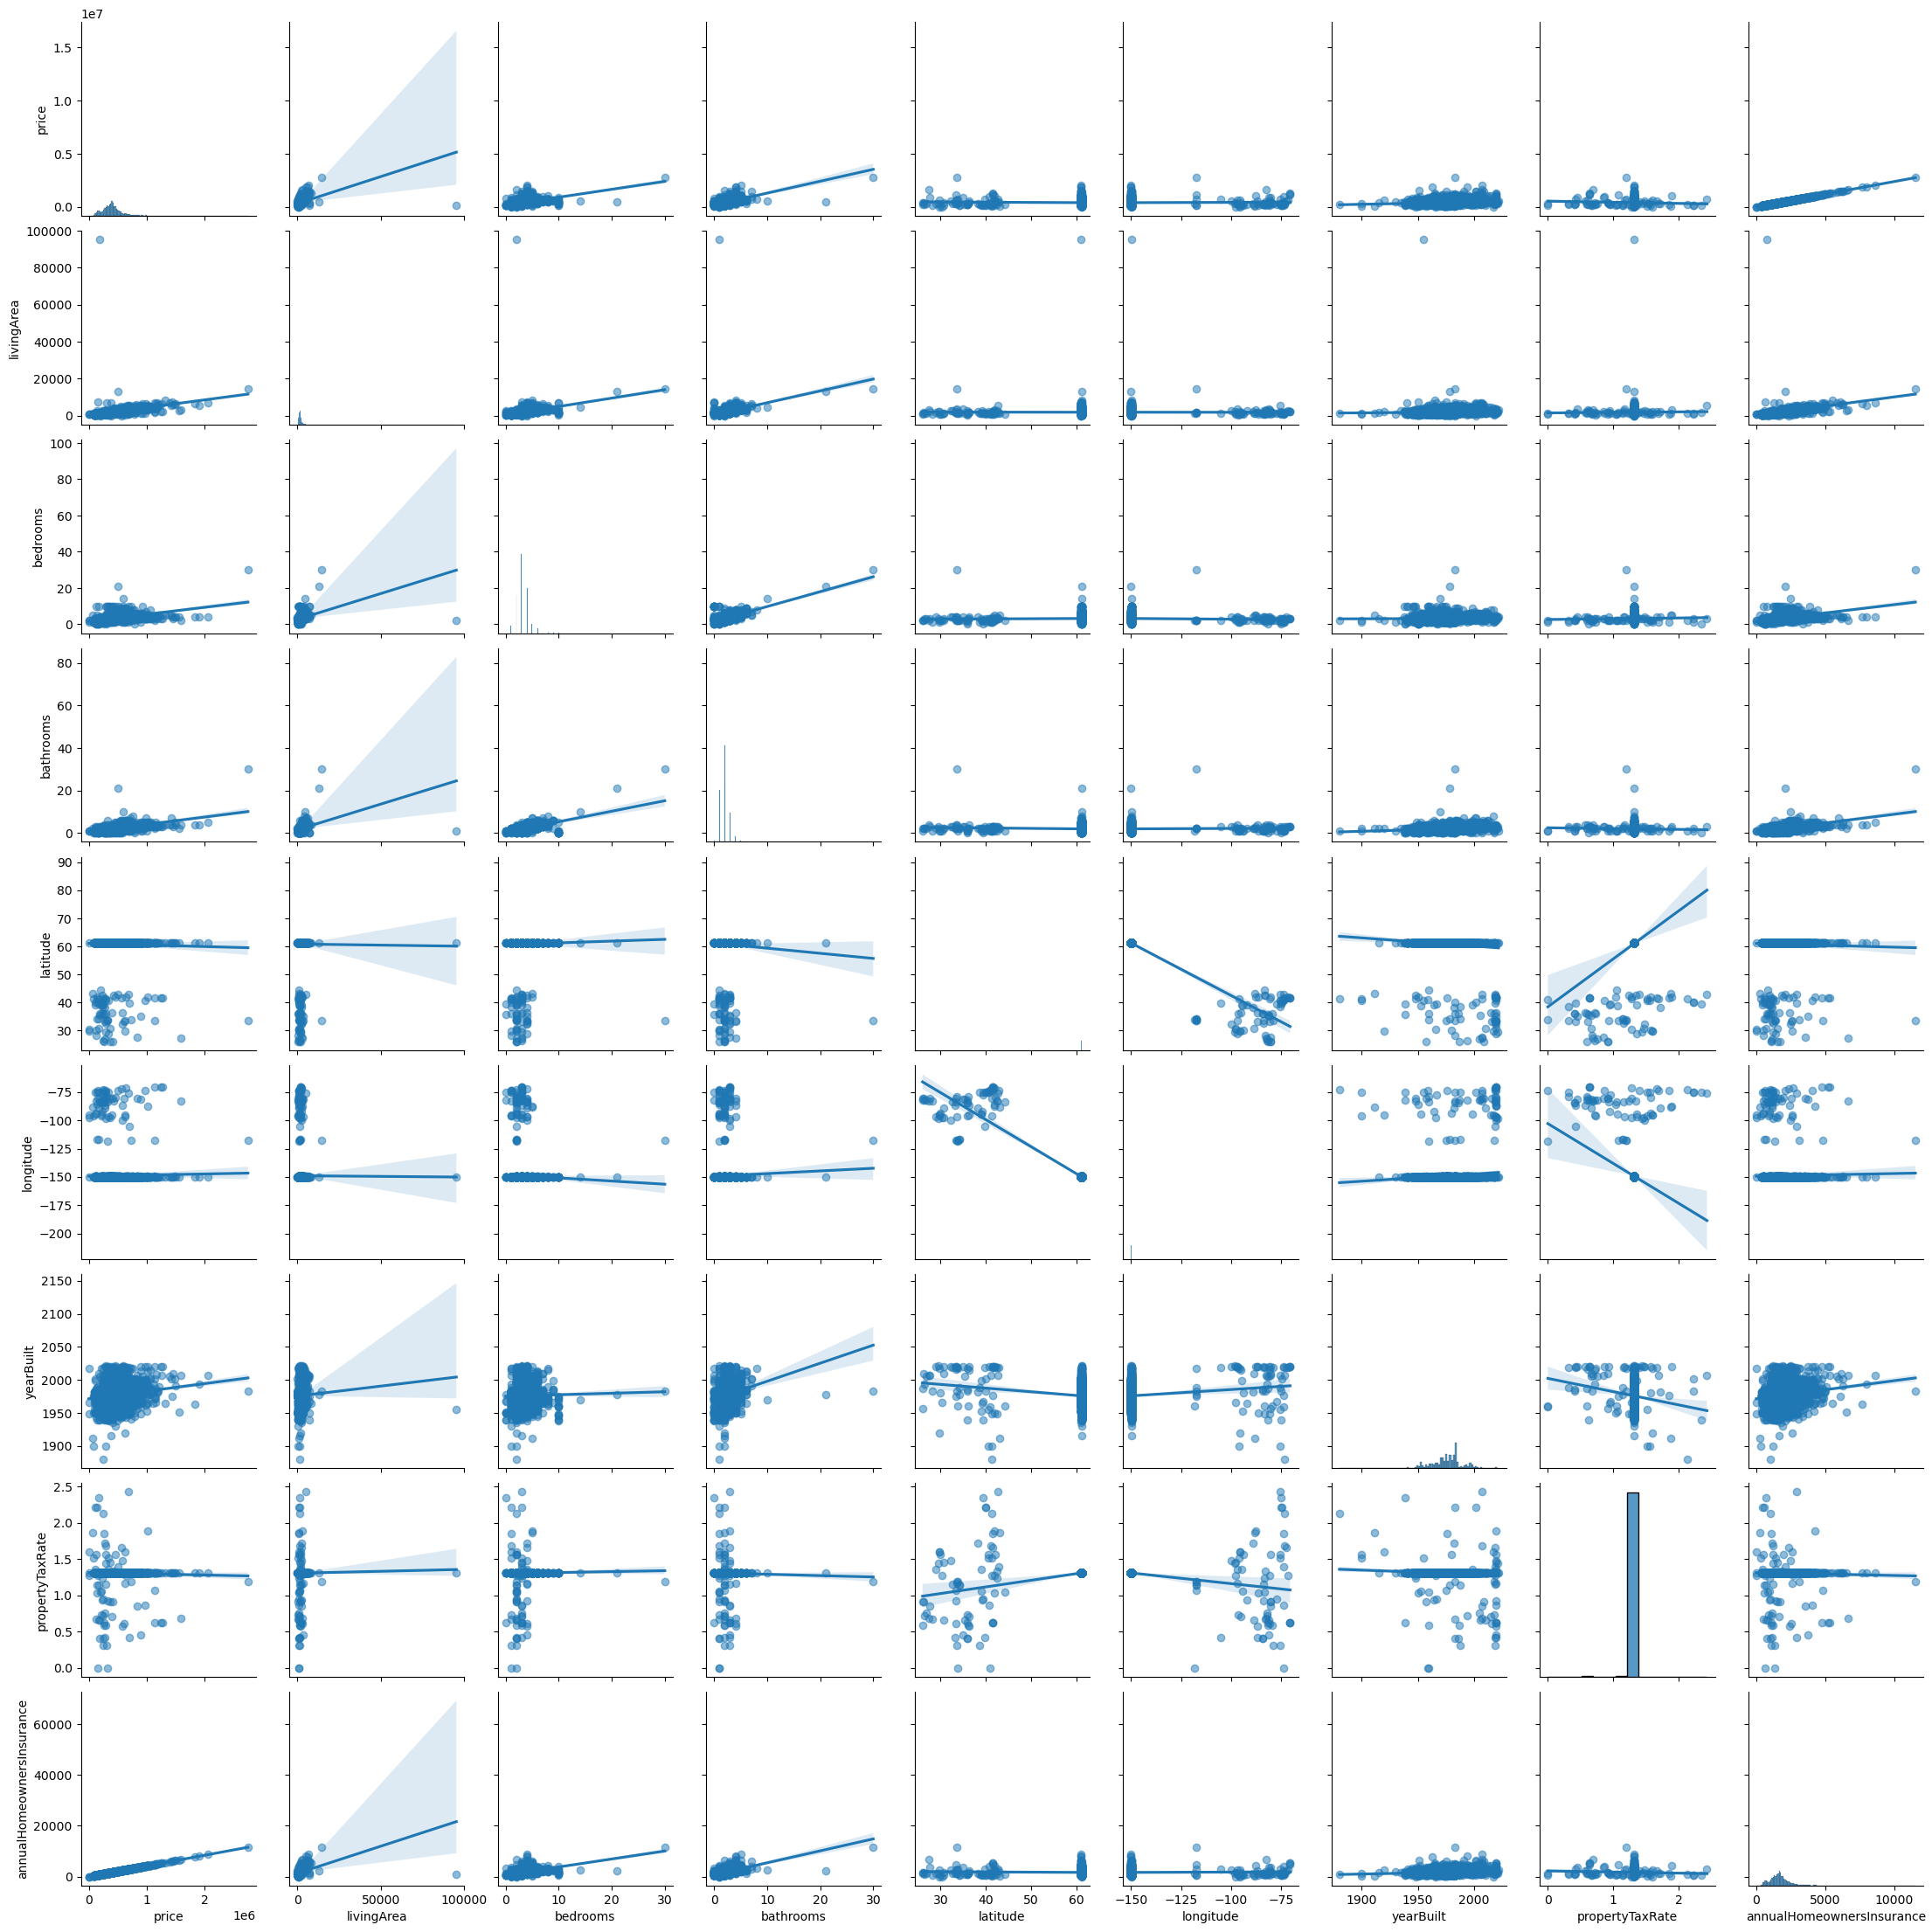

In [26]:
sns.pairplot(data=df, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})


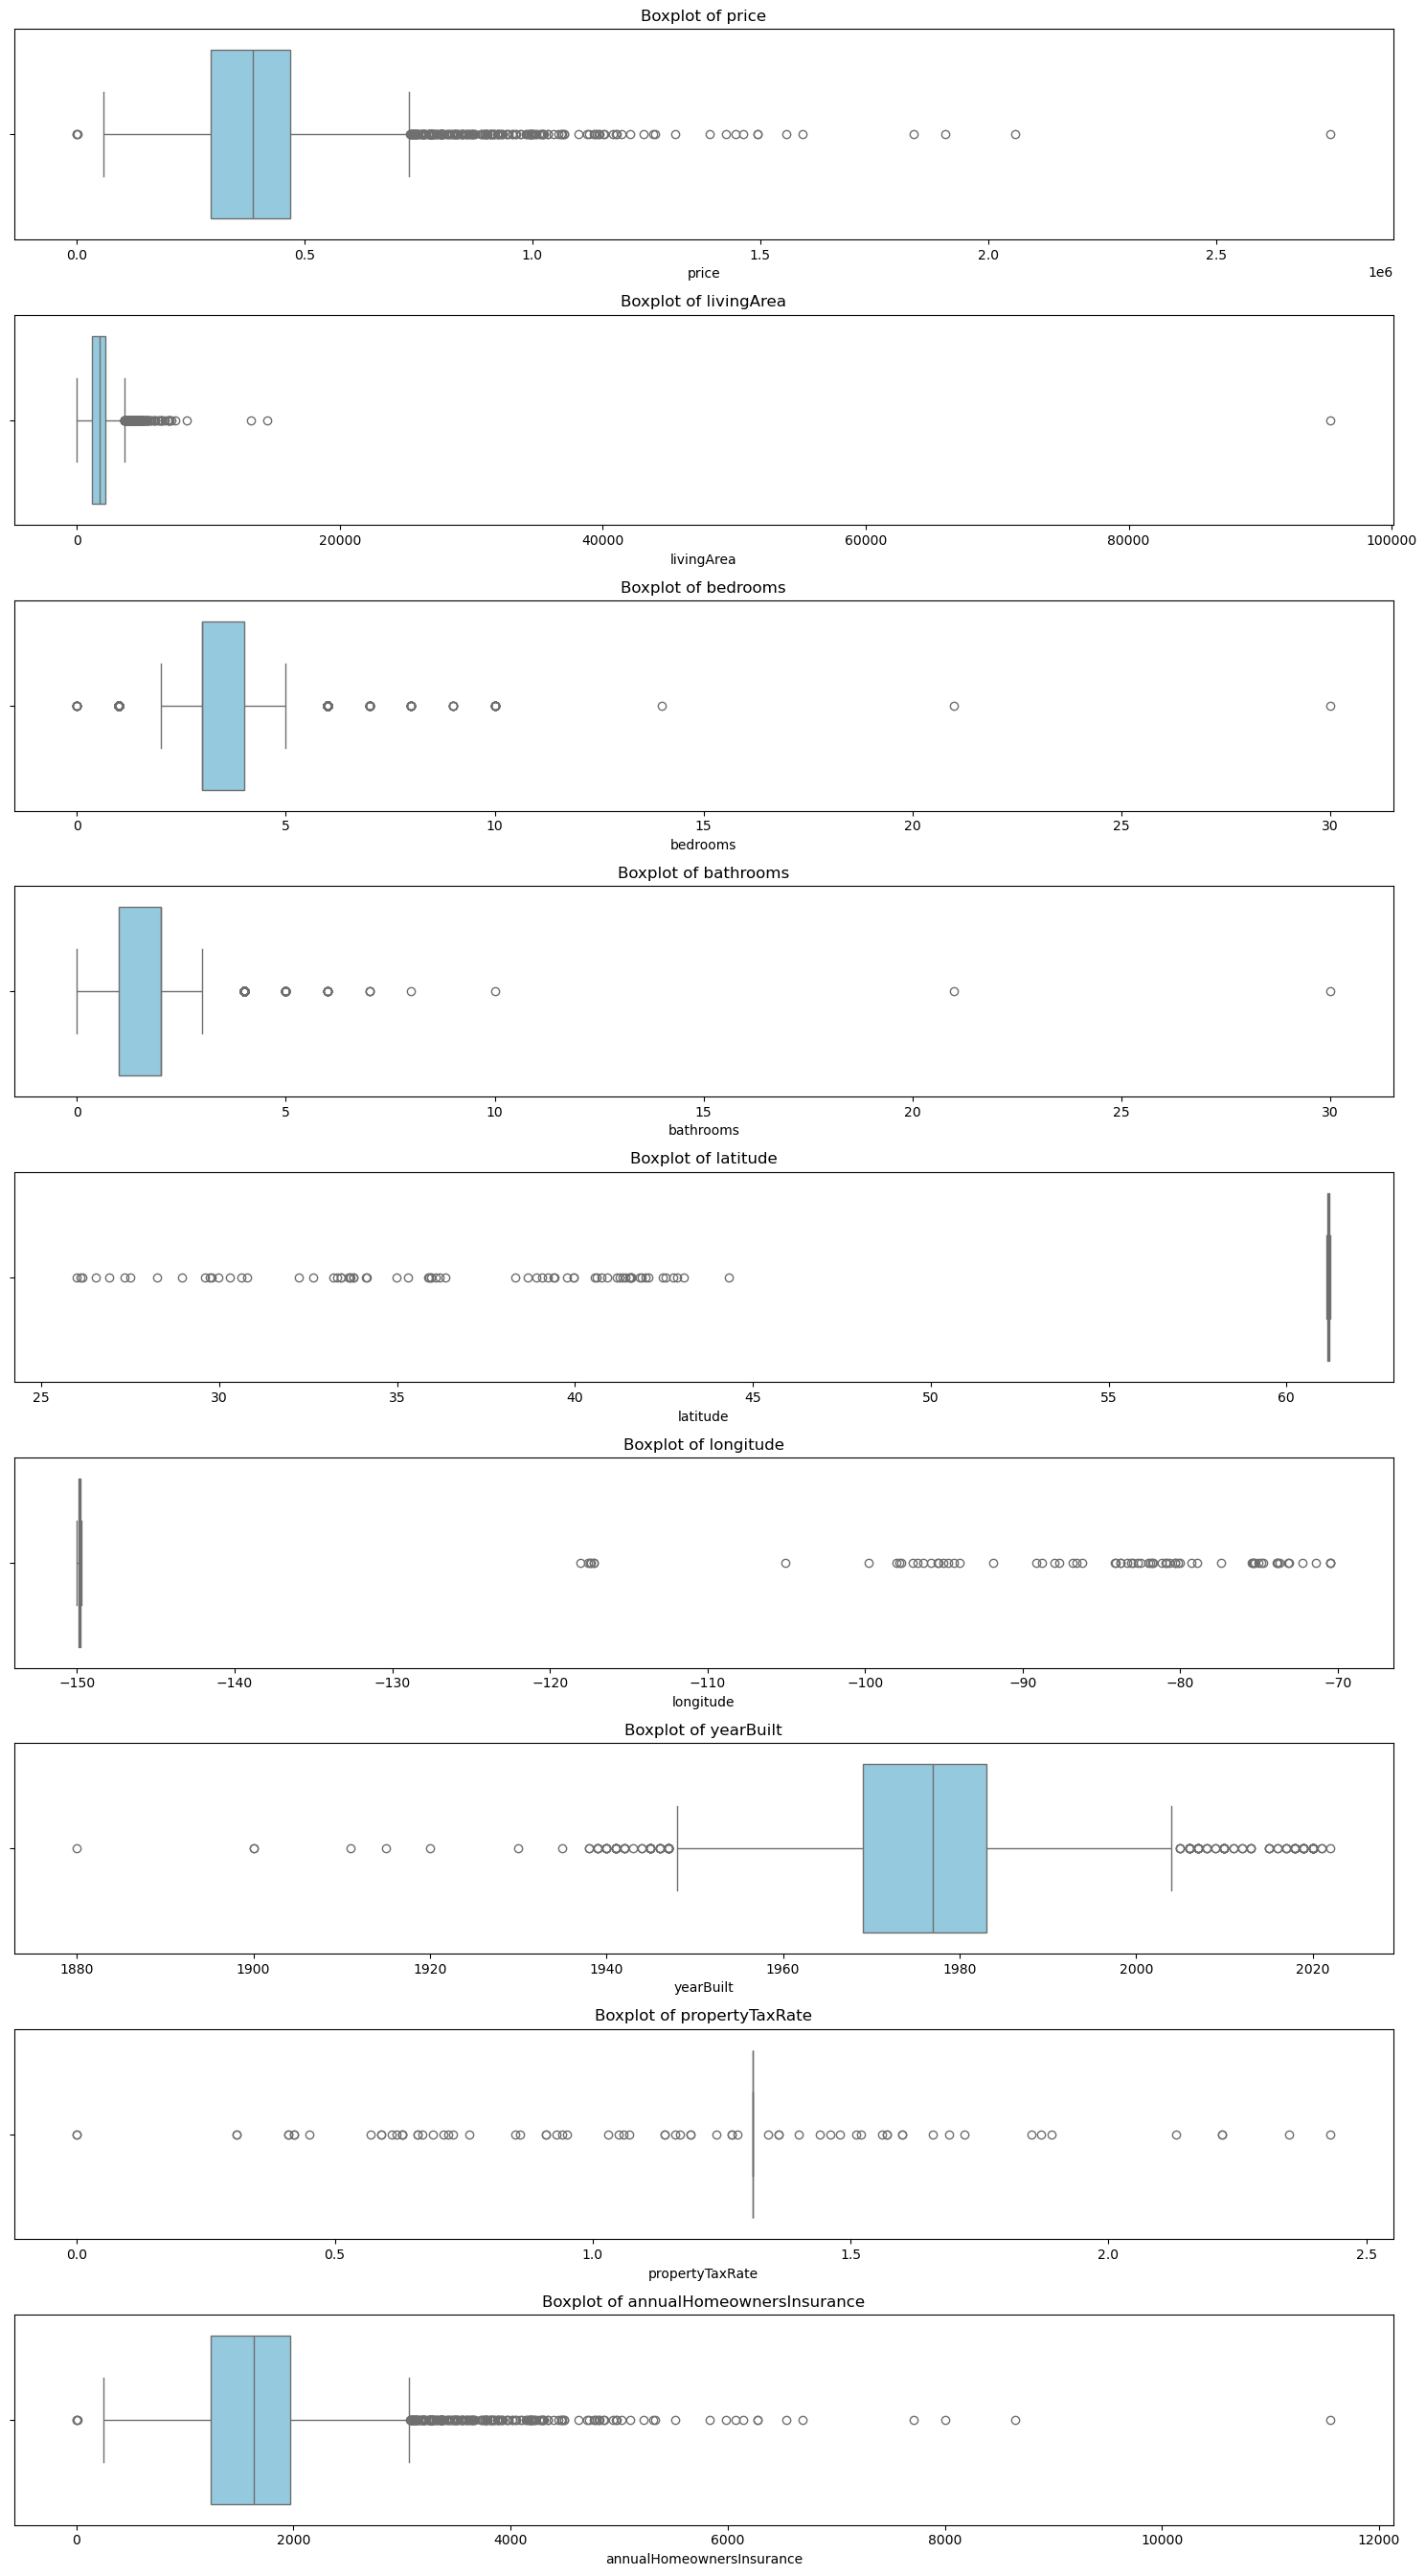

In [27]:

numeric_columns = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, len(numeric_columns) * 3))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [28]:
columns_to_filter = ['bedrooms', 'bathrooms', 'livingArea']
df_filtered = df.copy()
for col in columns_to_filter:
    Q1 = df_filtered[col].quantile(0.25)  
    Q3 = df_filtered[col].quantile(0.75)  
    IQR = Q3 - Q1                         
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
df.head()


,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance,homeType
0,676100.0,2668.0,3,2,61.217308,-149.90807,1959,1.31,2840,Single_Family
1,698600.0,3179.0,3,2,61.217136,-149.90822,1961,1.31,2934,Single_Family
2,996800.0,3059.0,4,3,61.217000,-149.90833,1983,1.31,4187,Single_Family
4,695300.0,1642.0,5,2,61.216720,-149.90834,1947,1.31,2920,Single_Family
6,603600.0,2560.0,3,3,61.217003,-149.90723,2018,1.31,2535,Condo


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4776 entries, 0 to 7159
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      4776 non-null   float64
 1   livingArea                 4776 non-null   float64
 2   bedrooms                   4776 non-null   int32  
 3   bathrooms                  4776 non-null   int32  
 4   latitude                   4776 non-null   float64
 5   longitude                  4776 non-null   float64
 6   yearBuilt                  4776 non-null   int32  
 7   propertyTaxRate            4776 non-null   float64
 8   annualHomeownersInsurance  4776 non-null   int64  
 9   homeType                   4776 non-null   object 
dtypes: float64(5), int32(3), int64(1), object(1)
memory usage: 354.5+ KB


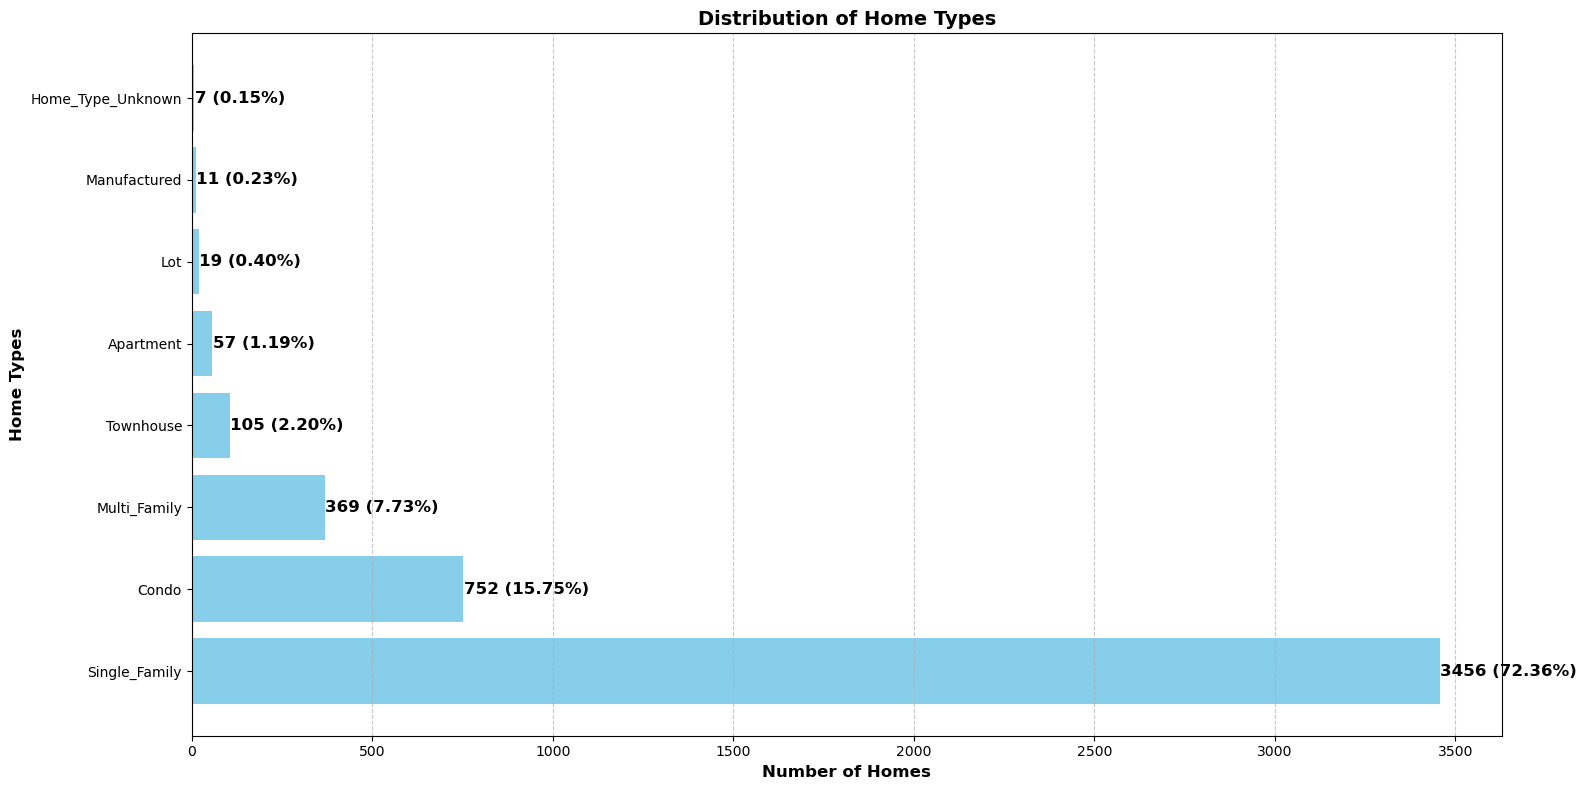

In [30]:


home_type_counts = df['homeType'].value_counts()

plt.figure(figsize=(16, 8))
bars = plt.barh(home_type_counts.index, home_type_counts, color='skyblue')

for bar in bars:
    plt.text(
        bar.get_width() + 1,  
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width()} ({bar.get_width() / home_type_counts.sum() * 100:.2f}%)',  
        va='center',
        fontsize=12,
        weight='bold'
    )

plt.title('Distribution of Home Types', fontsize=14, weight='bold')
plt.xlabel('Number of Homes', fontsize=12, weight='bold')
plt.ylabel('Home Types', fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()


In [31]:
df.head(3)

,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance,homeType
0,676100.0,2668.0,3,2,61.217308,-149.90807,1959,1.31,2840,Single_Family
1,698600.0,3179.0,3,2,61.217136,-149.90822,1961,1.31,2934,Single_Family
2,996800.0,3059.0,4,3,61.217000,-149.90833,1983,1.31,4187,Single_Family


In [32]:
#df.groupby('yearBuilt').mean()['price']

In [33]:
#df.groupby('yearBuilt').mean()['price'].plot()

In [34]:
correlations = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
correlations

price                        1.000000
annualHomeownersInsurance    1.000000
livingArea                   0.814098
bathrooms                    0.585690
bedrooms                     0.543868
yearBuilt                    0.114474
longitude                    0.027588
latitude                    -0.024043
propertyTaxRate             -0.061141
Name: price, dtype: float64

In [35]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()
corr_matrix 

,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance
price,1.000000,0.814098,0.543868,0.585690,-0.024043,0.027588,0.114474,-0.061141,1.000000
livingArea,0.814098,1.000000,0.645525,0.682404,0.007925,-0.008440,0.058768,0.009895,0.814097
bedrooms,0.543868,0.645525,1.000000,0.532595,0.067742,-0.067019,0.004721,0.033731,0.543871
bathrooms,0.585690,0.682404,0.532595,1.000000,-0.021097,0.018518,0.207394,-0.032225,0.585683
latitude,-0.024043,0.007925,0.067742,-0.021097,1.000000,-0.947402,-0.129888,0.427311,-0.024050
longitude,0.027588,-0.008440,-0.067019,0.018518,-0.947402,1.000000,0.111702,-0.365734,0.027594
yearBuilt,0.114474,0.058768,0.004721,0.207394,-0.129888,0.111702,1.000000,-0.120163,0.114466
propertyTaxRate,-0.061141,0.009895,0.033731,-0.032225,0.427311,-0.365734,-0.120163,1.000000,-0.061132
annualHomeownersInsurance,1.000000,0.814097,0.543871,0.585683,-0.024050,0.027594,0.114466,-0.061132,1.000000


<Axes: >

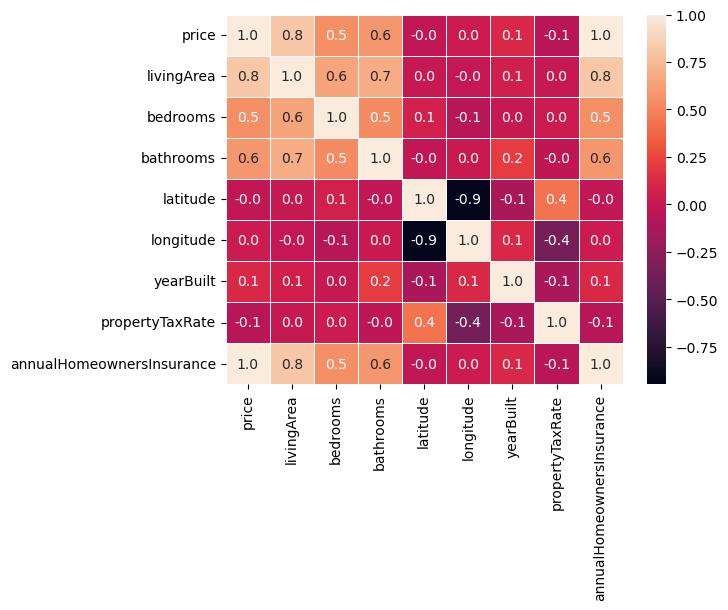

In [36]:
sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidth=0.5)

In [37]:
df = pd.get_dummies(df, columns=['homeType']).astype('int')


In [38]:
df

,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance,homeType_Apartment,homeType_Condo,homeType_Home_Type_Unknown,homeType_Lot,homeType_Manufactured,homeType_Multi_Family,homeType_Single_Family,homeType_Townhouse
0,676100,2668,3,2,61,-149,1959,1,2840,0,0,0,0,0,0,1,0
1,698600,3179,3,2,61,-149,1961,1,2934,0,0,0,0,0,0,1,0
2,996800,3059,4,3,61,-149,1983,1,4187,0,0,0,0,0,0,1,0
4,695300,1642,5,2,61,-149,1947,1,2920,0,0,0,0,0,0,1,0
6,603600,2560,3,3,61,-149,2018,1,2535,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7152,436800,1789,3,2,61,-149,1974,1,1835,0,0,0,0,0,0,1,0
7153,429400,1496,3,2,61,-149,1974,1,1803,0,0,0,0,0,0,1,0
7154,456300,1838,3,2,61,-149,1974,1,1916,0,0,0,0,0,0,1,0
7156,514200,2200,4,2,61,-149,1974,1,2160,0,0,0,0,0,0,1,0


In [39]:
df.reset_index(drop=True)


,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance,homeType_Apartment,homeType_Condo,homeType_Home_Type_Unknown,homeType_Lot,homeType_Manufactured,homeType_Multi_Family,homeType_Single_Family,homeType_Townhouse
0,676100,2668,3,2,61,-149,1959,1,2840,0,0,0,0,0,0,1,0
1,698600,3179,3,2,61,-149,1961,1,2934,0,0,0,0,0,0,1,0
2,996800,3059,4,3,61,-149,1983,1,4187,0,0,0,0,0,0,1,0
3,695300,1642,5,2,61,-149,1947,1,2920,0,0,0,0,0,0,1,0
4,603600,2560,3,3,61,-149,2018,1,2535,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,436800,1789,3,2,61,-149,1974,1,1835,0,0,0,0,0,0,1,0
4772,429400,1496,3,2,61,-149,1974,1,1803,0,0,0,0,0,0,1,0
4773,456300,1838,3,2,61,-149,1974,1,1916,0,0,0,0,0,0,1,0
4774,514200,2200,4,2,61,-149,1974,1,2160,0,0,0,0,0,0,1,0


In [40]:
df.describe()

,price,livingArea,bedrooms,bathrooms,latitude,longitude,yearBuilt,propertyTaxRate,annualHomeownersInsurance,homeType_Apartment,homeType_Condo,homeType_Home_Type_Unknown,homeType_Lot,homeType_Manufactured,homeType_Multi_Family,homeType_Single_Family,homeType_Townhouse
count,4.776000e+03,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000
mean,3.794261e+05,1684.464196,3.126256,1.890494,60.632328,-148.088358,1975.791248,0.994137,1593.607831,0.011935,0.157454,0.001466,0.003978,0.002303,0.077261,0.723618,0.021985
std,1.416218e+05,662.417217,1.111658,0.762982,3.101777,7.688854,13.204100,0.086631,594.809183,0.108603,0.364266,0.038260,0.062954,0.047941,0.267034,0.447255,0.146650
min,1.250000e+03,1.000000,0.000000,0.000000,26.000000,-150.000000,1880.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.911750e+05,1152.000000,2.000000,1.000000,61.000000,-149.000000,1969.000000,1.000000,1223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.812500e+05,1661.000000,3.000000,2.000000,61.000000,-149.000000,1977.000000,1.000000,1601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.562250e+05,2073.000000,4.000000,2.000000,61.000000,-149.000000,1983.000000,1.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.592300e+06,3616.000000,10.000000,6.000000,61.000000,-70.000000,2022.000000,2.000000,6688.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
len(df[df['livingArea']<300])

3

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [43]:
X = df.drop('price', axis=1)  
y = df['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train.shape 

(3820, 16)

In [46]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))  
model.add(Dense(16, activation='relu')) 
model.add(Dense(32, activation='relu'))  
model.add(Dense(1))
model.compile(optimizer=Adam(), loss='mse')

c:\Users\alira\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs=500, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 163657367552.0000 - val_loss: 78224097280.0000
Epoch 2/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 34241554432.0000 - val_loss: 9597488128.0000
Epoch 3/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 9505349632.0000 - val_loss: 8412802048.0000
Epoch 4/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 9087835136.0000 - val_loss: 7564963328.0000
Epoch 5/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 7148505088.0000 - val_loss: 6929261056.0000
Epoch 6/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 6885384704.0000 - val_loss: 6481917952.0000
Epoch 7/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6160819200.0000 - val_loss: 5975347200.0000
Epoch 8/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 5775686656.0000 - val_loss: 5547191296.0000
Epoch 9/500
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 5320414720.0000 - val_loss: 4968986112.0000
Epoch 10/500
306/306 ━━━━━━━━━━━━━━━━

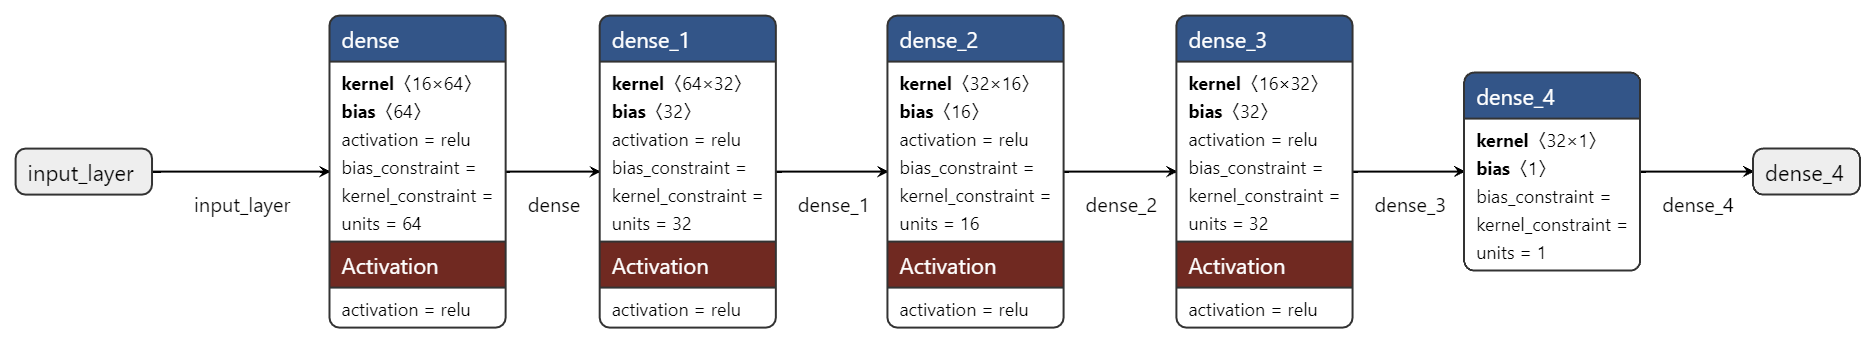

In [48]:
y_pred = model.predict(X_test_scaled)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [49]:
from sklearn.metrics import  r2_score

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


R^2 Score: 0.9999966621398926


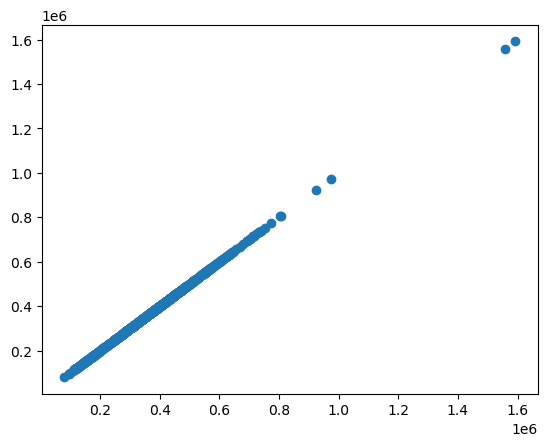

In [50]:
plt.scatter(y_test,y_pred)

In [51]:
y_test = y_test.ravel()  
y_pred = y_pred.ravel() 
compare = pd.DataFrame({'actual_prices': y_test, 'prediction': y_pred})

C:\Users\alira\AppData\Local\Temp\ipykernel_19964\1222130333.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


In [52]:
compare

,actual_prices,prediction
0,283600,282805.62500
1,356400,356457.75000
2,308800,308820.43750
3,493100,493103.87500
4,352300,352503.40625
...,...,...
951,464700,464785.06250
952,273400,273329.78125
953,463700,463819.46875
954,271800,271840.93750


In [53]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_house = df.drop('price', axis =1).iloc[random_ind]
new_house


livingArea                    2280
bedrooms                         4
bathrooms                        2
latitude                        61
longitude                     -149
yearBuilt                     1981
propertyTaxRate                  1
annualHomeownersInsurance     2442
homeType_Apartment               0
homeType_Condo                   0
homeType_Home_Type_Unknown       0
homeType_Lot                     0
homeType_Manufactured            0
homeType_Multi_Family            0
homeType_Single_Family           1
homeType_Townhouse               0
Name: 7137, dtype: int32

In [54]:
new_house = scaler.transform(new_house.values.reshape(1,16))

c:\Users\alira\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [55]:
new_house

array([[0.63042877, 0.4       , 0.33333333, 1.        , 0.0125    ,
        0.71126761, 0.5       , 0.45748076, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [56]:
model.predict(new_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[581547.4]], dtype=float32)

In [57]:
df.iloc[random_ind]['price']

581500

In [58]:
df.columns

Index(['price', 'livingArea', 'bedrooms', 'bathrooms', 'latitude', 'longitude',
       'yearBuilt', 'propertyTaxRate', 'annualHomeownersInsurance',
       'homeType_Apartment', 'homeType_Condo', 'homeType_Home_Type_Unknown',
       'homeType_Lot', 'homeType_Manufactured', 'homeType_Multi_Family',
       'homeType_Single_Family', 'homeType_Townhouse'],
      dtype='object')

In [59]:
import joblib
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [60]:
model = joblib.load('house_price_model.pkl')    
scaler = joblib.load('scaler.pkl')           
def predict_house_price(livingArea, bedrooms, bathrooms, latitude, longitude, yearBuilt, homeType,
                        propertyTaxRate=None, annualHomeownersInsurance=None):
    home_types = ['Apartment', 'Condo', 'Single_Family', 'Townhouse', 'Lot', 'Manufactured', 'Multi_Family', 'Home_Type_Unknown']
    home_type_encoded = [1 if homeType == ht else 0 for ht in home_types]
    propertyTaxRate = propertyTaxRate if propertyTaxRate is not None else 0.0
    annualHomeownersInsurance = annualHomeownersInsurance if annualHomeownersInsurance is not None else 0.0
    features = np.array([livingArea, bedrooms, bathrooms, latitude, longitude, yearBuilt,
                         propertyTaxRate, annualHomeownersInsurance] + home_type_encoded)
    print(f"the features are : {features}")
    features_scaled = scaler.transform(features.reshape(1, -1))
    predicted_price = model.predict(features_scaled)
    return float(predicted_price[0])



In [63]:
if __name__ == "__main__":
    livingArea = 3000   
    bedrooms = 4          
    bathrooms = 2          
    latitude = 35.0444    
    longitude = 38.2357
    yearBuilt = 2010      
    homeType = 'homeType_Single_Family' 
    propertyTaxRate = 2 
    annualHomeownersInsurance = 600  

    price = predict_house_price(livingArea, bedrooms, bathrooms, latitude, longitude, yearBuilt, homeType,
                                 propertyTaxRate, annualHomeownersInsurance)

    print(f" the predictable price is : {price:.2f} $")


the features are : [3.00000e+03 4.00000e+00 2.00000e+00 3.50444e+01 3.82357e+01 2.01000e+03
 2.00000e+00 6.00000e+02 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 the predictable price is : 110296.12 $


c:\Users\alira\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\alira\AppData\Local\Temp\ipykernel_19964\2127674027.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(predicted_price[0])
